In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as cm
import os
import glob
from tqdm import tqdm_notebook as tqdm
import pydicom
import skimage.feature
import skimage.morphology
import skimage.filters

In [2]:
CSV = '/media/hdd/Kaggle/Pneumothorax/Data/testset.csv'

In [3]:
df = pd.read_csv(CSV)

In [4]:
def read_dicom(path):
    dcm = pydicom.dcmread(path, force=False)
    if dcm.file_meta.TransferSyntaxUID is None:
        dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    im = dcm.pixel_array
    meta = dict(height=dcm.get('Rows'),
                width=dcm.get('Columns'),
                id=dcm.get('PatientID'),
                view=dcm.get('ViewPosition'),
                age=dcm.get("PatientAge"),
                sex=dcm.get("PatientSex"),
                )
    return im, meta

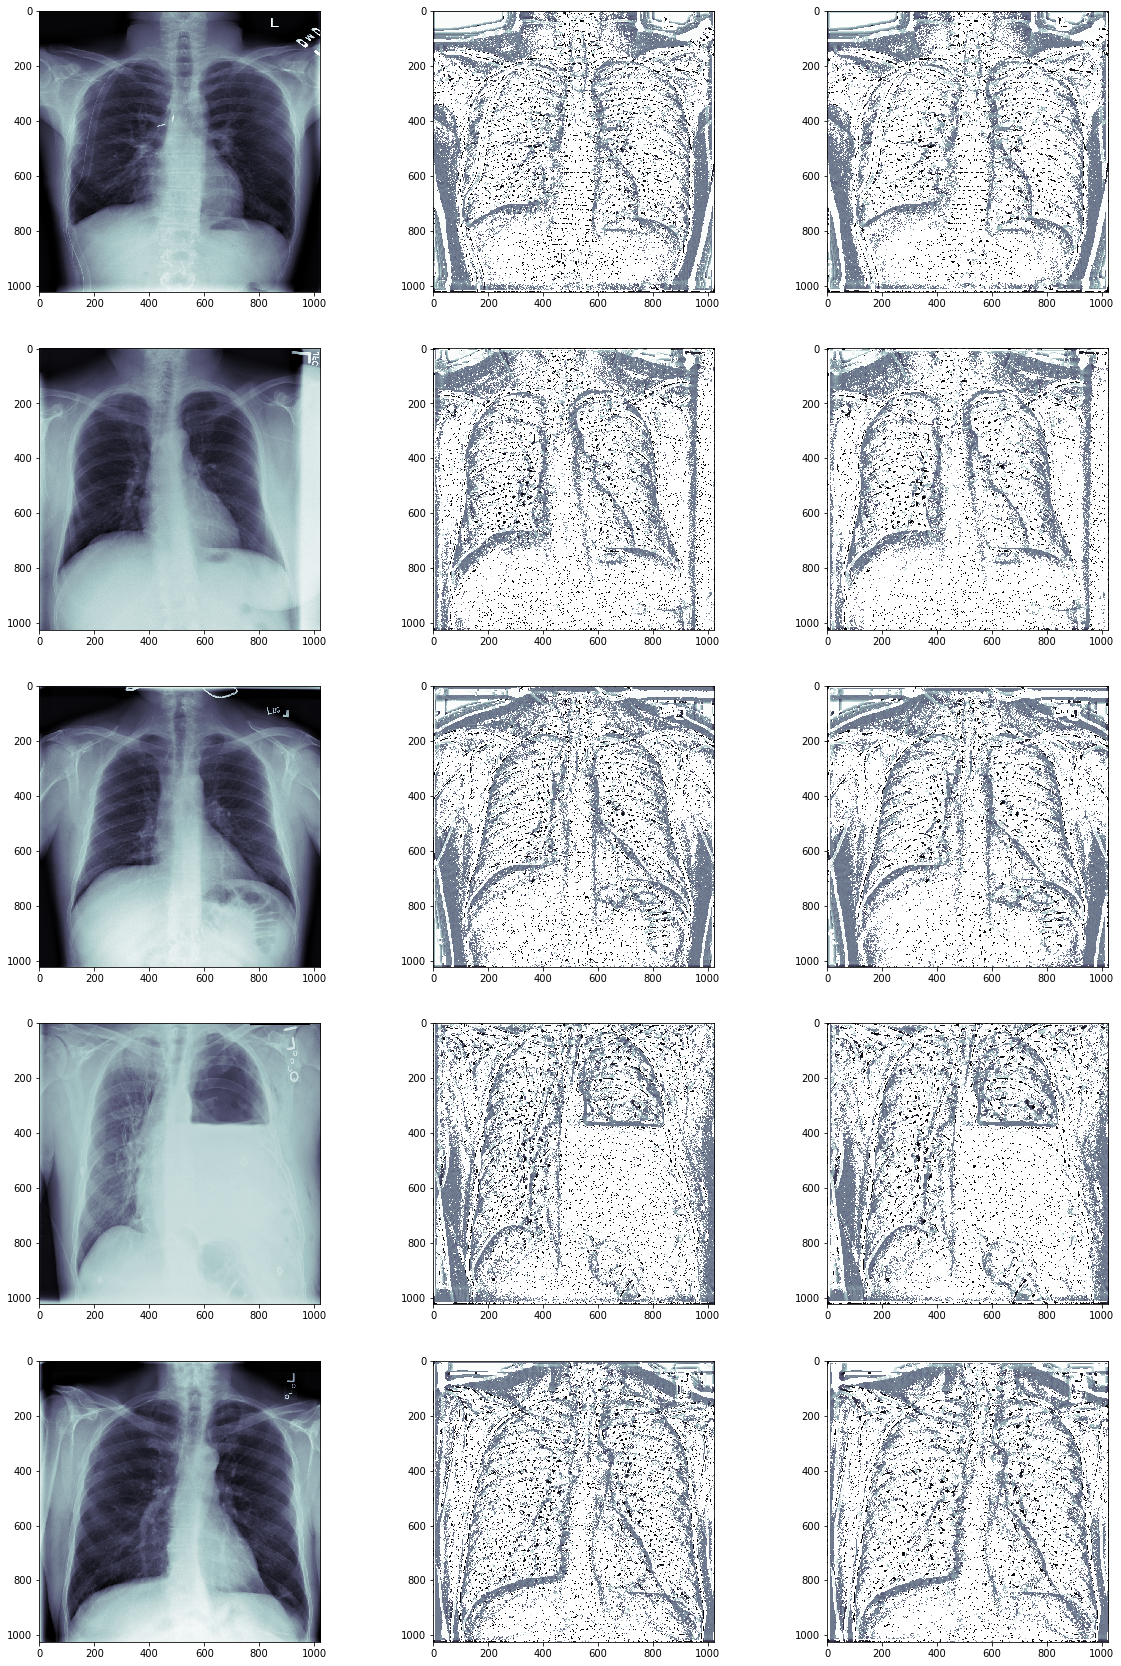

In [16]:
samples = df.sample(5 * 3, replace=False)
fig, axs = plt.subplots(5, 3, figsize=(20, 30))

for i in range(5):
    im, meta = read_dicom(samples.iloc[i].Path)
    axs[i, 0].imshow(im, cmap=plt.cm.bone)
    axs[i, 1].imshow(skimage.feature.local_binary_pattern(im, 8 * 9, 9, method='uniform'), cmap=plt.cm.bone)
    axs[i, 2].imshow(skimage.feature.local_binary_pattern(im, 8 * 11, 11, method='uniform'), cmap=plt.cm.bone)
plt.show()

In [9]:
def gamma_enh(im, gamma=2, _range=255):
    return (im.astype(np.float32) / _range) ** gamma

def smooth_lung(im, k=1000):
    return skimage.morphology.area_opening(im, area_threshold=k)#selem=np.ones((k, k)))

def pipeline(im):
    im = gamma_enh(im, gamma=2)
    im = smooth_lung(im)
    ths = skimage.filters.threshold_otsu(im)
#     im = im < ths
    return im

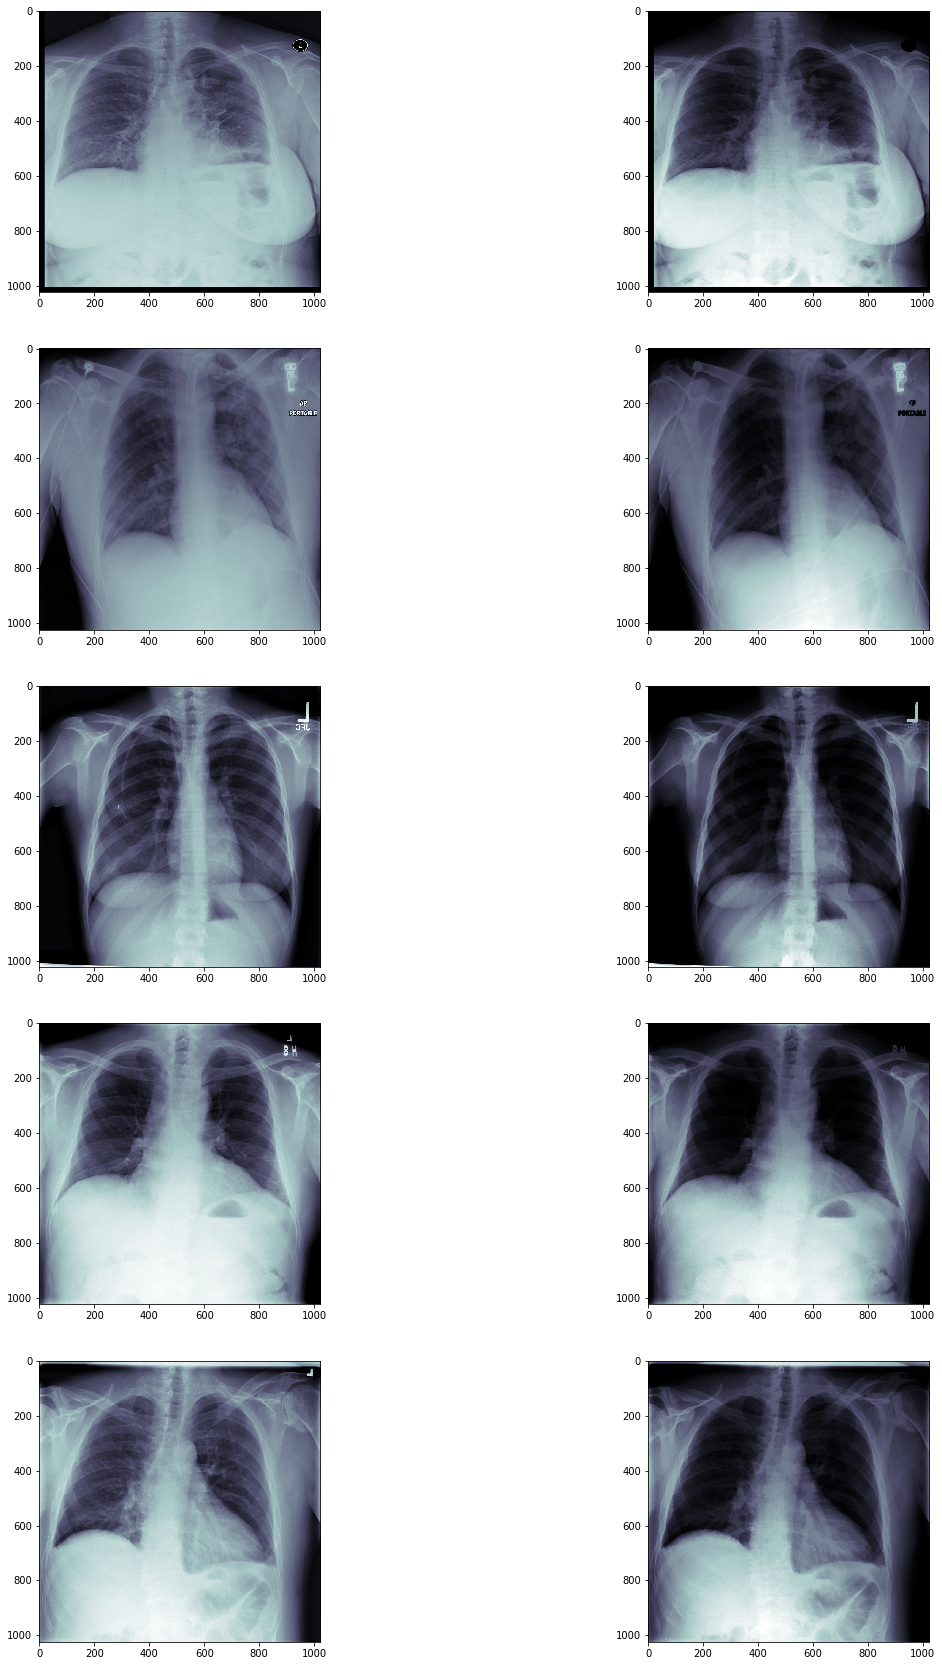

In [10]:
# samples = df.sample(5 * 3, replace=False)
samples = df.iloc[:5]
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

for i in range(5):
    im, meta = read_dicom(samples.iloc[i].Path)
    axs[i, 0].imshow(im, cmap=plt.cm.bone)
    axs[i, 1].imshow(pipeline(im), cmap=plt.cm.bone)
plt.show()